1. Install and Import Dependencies

In [69]:
!pip uninstall torch torchvision torchaudio

^C


In [1]:
!pip install torch==2.3.1+cu121 torchvision==0.18.1+cu121 torchaudio==2.3.1+cu121 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.18.1%2Bcu121-cp311-cp311-win_amd64.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.3.1%2Bcu121-cp311-cp311-win_amd64.whl (4.1 MB)


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
import cv2

2. Load Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\edkk1/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-7-1 Python-3.11.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Ti, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [7]:
print(torch.cuda.is_available())
print(torch.__version__)
print(torchvision.__version__)

True
2.3.1+cu121
0.18.1+cu121


3. Make Detections

In [18]:
img = './images/bus.jpg'
# img = 'https://ultralytics.com/images/zidane.jpg'

In [19]:
results = model(img)
print(results)

image 1/1: 1080x810 4 persons, 1 bus
Speed: 7.0ms pre-process, 5.0ms inference, 121.0ms NMS per image at shape (1, 3, 640, 480)


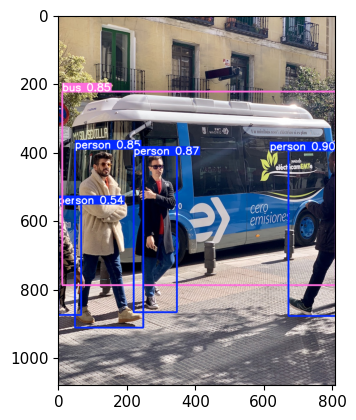

In [20]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [28]:
results.render()

[array([[[172, 148, 122],
         [170, 146, 120],
         [177, 153, 125],
         ...,
         [184, 170, 157],
         [185, 171, 158],
         [185, 171, 158]],
 
        [[177, 153, 127],
         [174, 150, 124],
         [179, 155, 127],
         ...,
         [185, 171, 158],
         [186, 172, 159],
         [186, 172, 159]],
 
        [[178, 154, 128],
         [176, 152, 126],
         [178, 154, 126],
         ...,
         [185, 171, 158],
         [185, 171, 158],
         [185, 171, 158]],
 
        ...,
 
        [[191, 185, 185],
         [188, 182, 182],
         [185, 179, 179],
         ...,
         [112, 107, 114],
         [111, 105, 115],
         [112, 106, 116]],
 
        [[163, 157, 157],
         [186, 180, 180],
         [190, 186, 185],
         ...,
         [103,  97, 107],
         [ 98,  92, 102],
         [104,  98, 108]],
 
        [[118, 112, 112],
         [166, 160, 160],
         [174, 170, 169],
         ...,
         [ 95,  89,  99],
  

4. Real Time Detections

In [29]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cam.release()
cv2.destroyAllWindows()

5. Train from scratch

6. Load Model